In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns = 'Id', axis = 1, inplace = True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

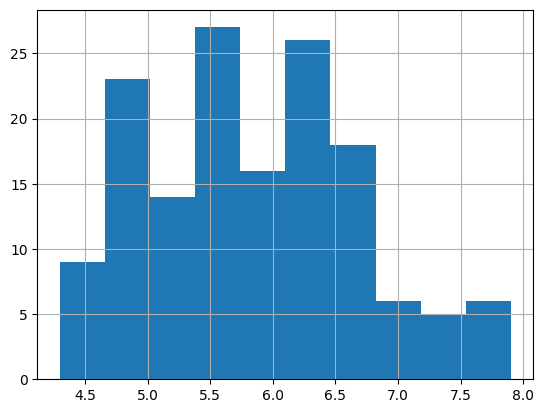

In [10]:
df['SepalLengthCm'].hist()

<Axes: >

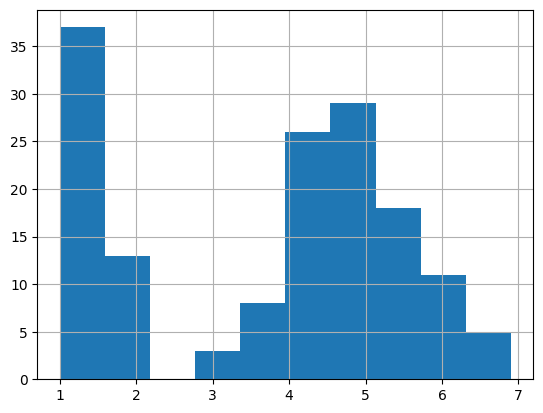

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

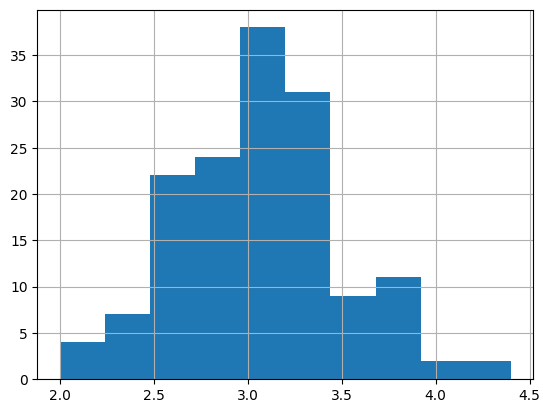

In [12]:
df['SepalWidthCm'].hist()

<Axes: >

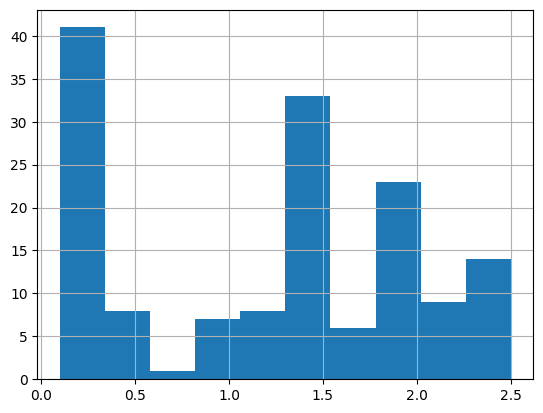

In [13]:
df['PetalWidthCm'].hist()

In [14]:
df.drop('Species', axis = 1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

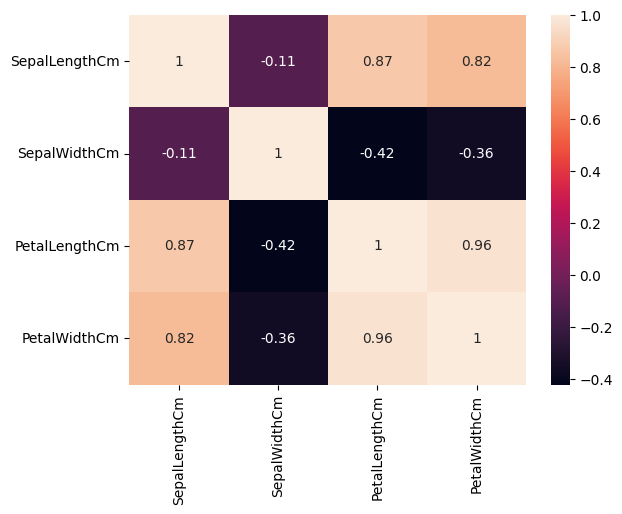

In [15]:
sns.heatmap(df.drop('Species', axis = 1).corr(), annot = True)

In [16]:
x = df.drop('Species', axis = 1)
y = df['Species'].values

In [17]:
y[0]

'Iris-setosa'

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

Logistic Regression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred_lr = lr.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic regression Test Accuracy:", accuracy)
print("Logistic regression Test Precision:", precision)
print("Logistic regression Test Recall:", recall)
print("Logistic regression Test F1 Score:", f1)

Logistic regression Test Accuracy: 0.9777777777777777
Logistic regression Test Precision: 0.9794871794871796
Logistic regression Test Recall: 0.9777777777777777
Logistic regression Test F1 Score: 0.9779373219373221


In [30]:
cm = confusion_matrix(y_test, y_pred_lr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


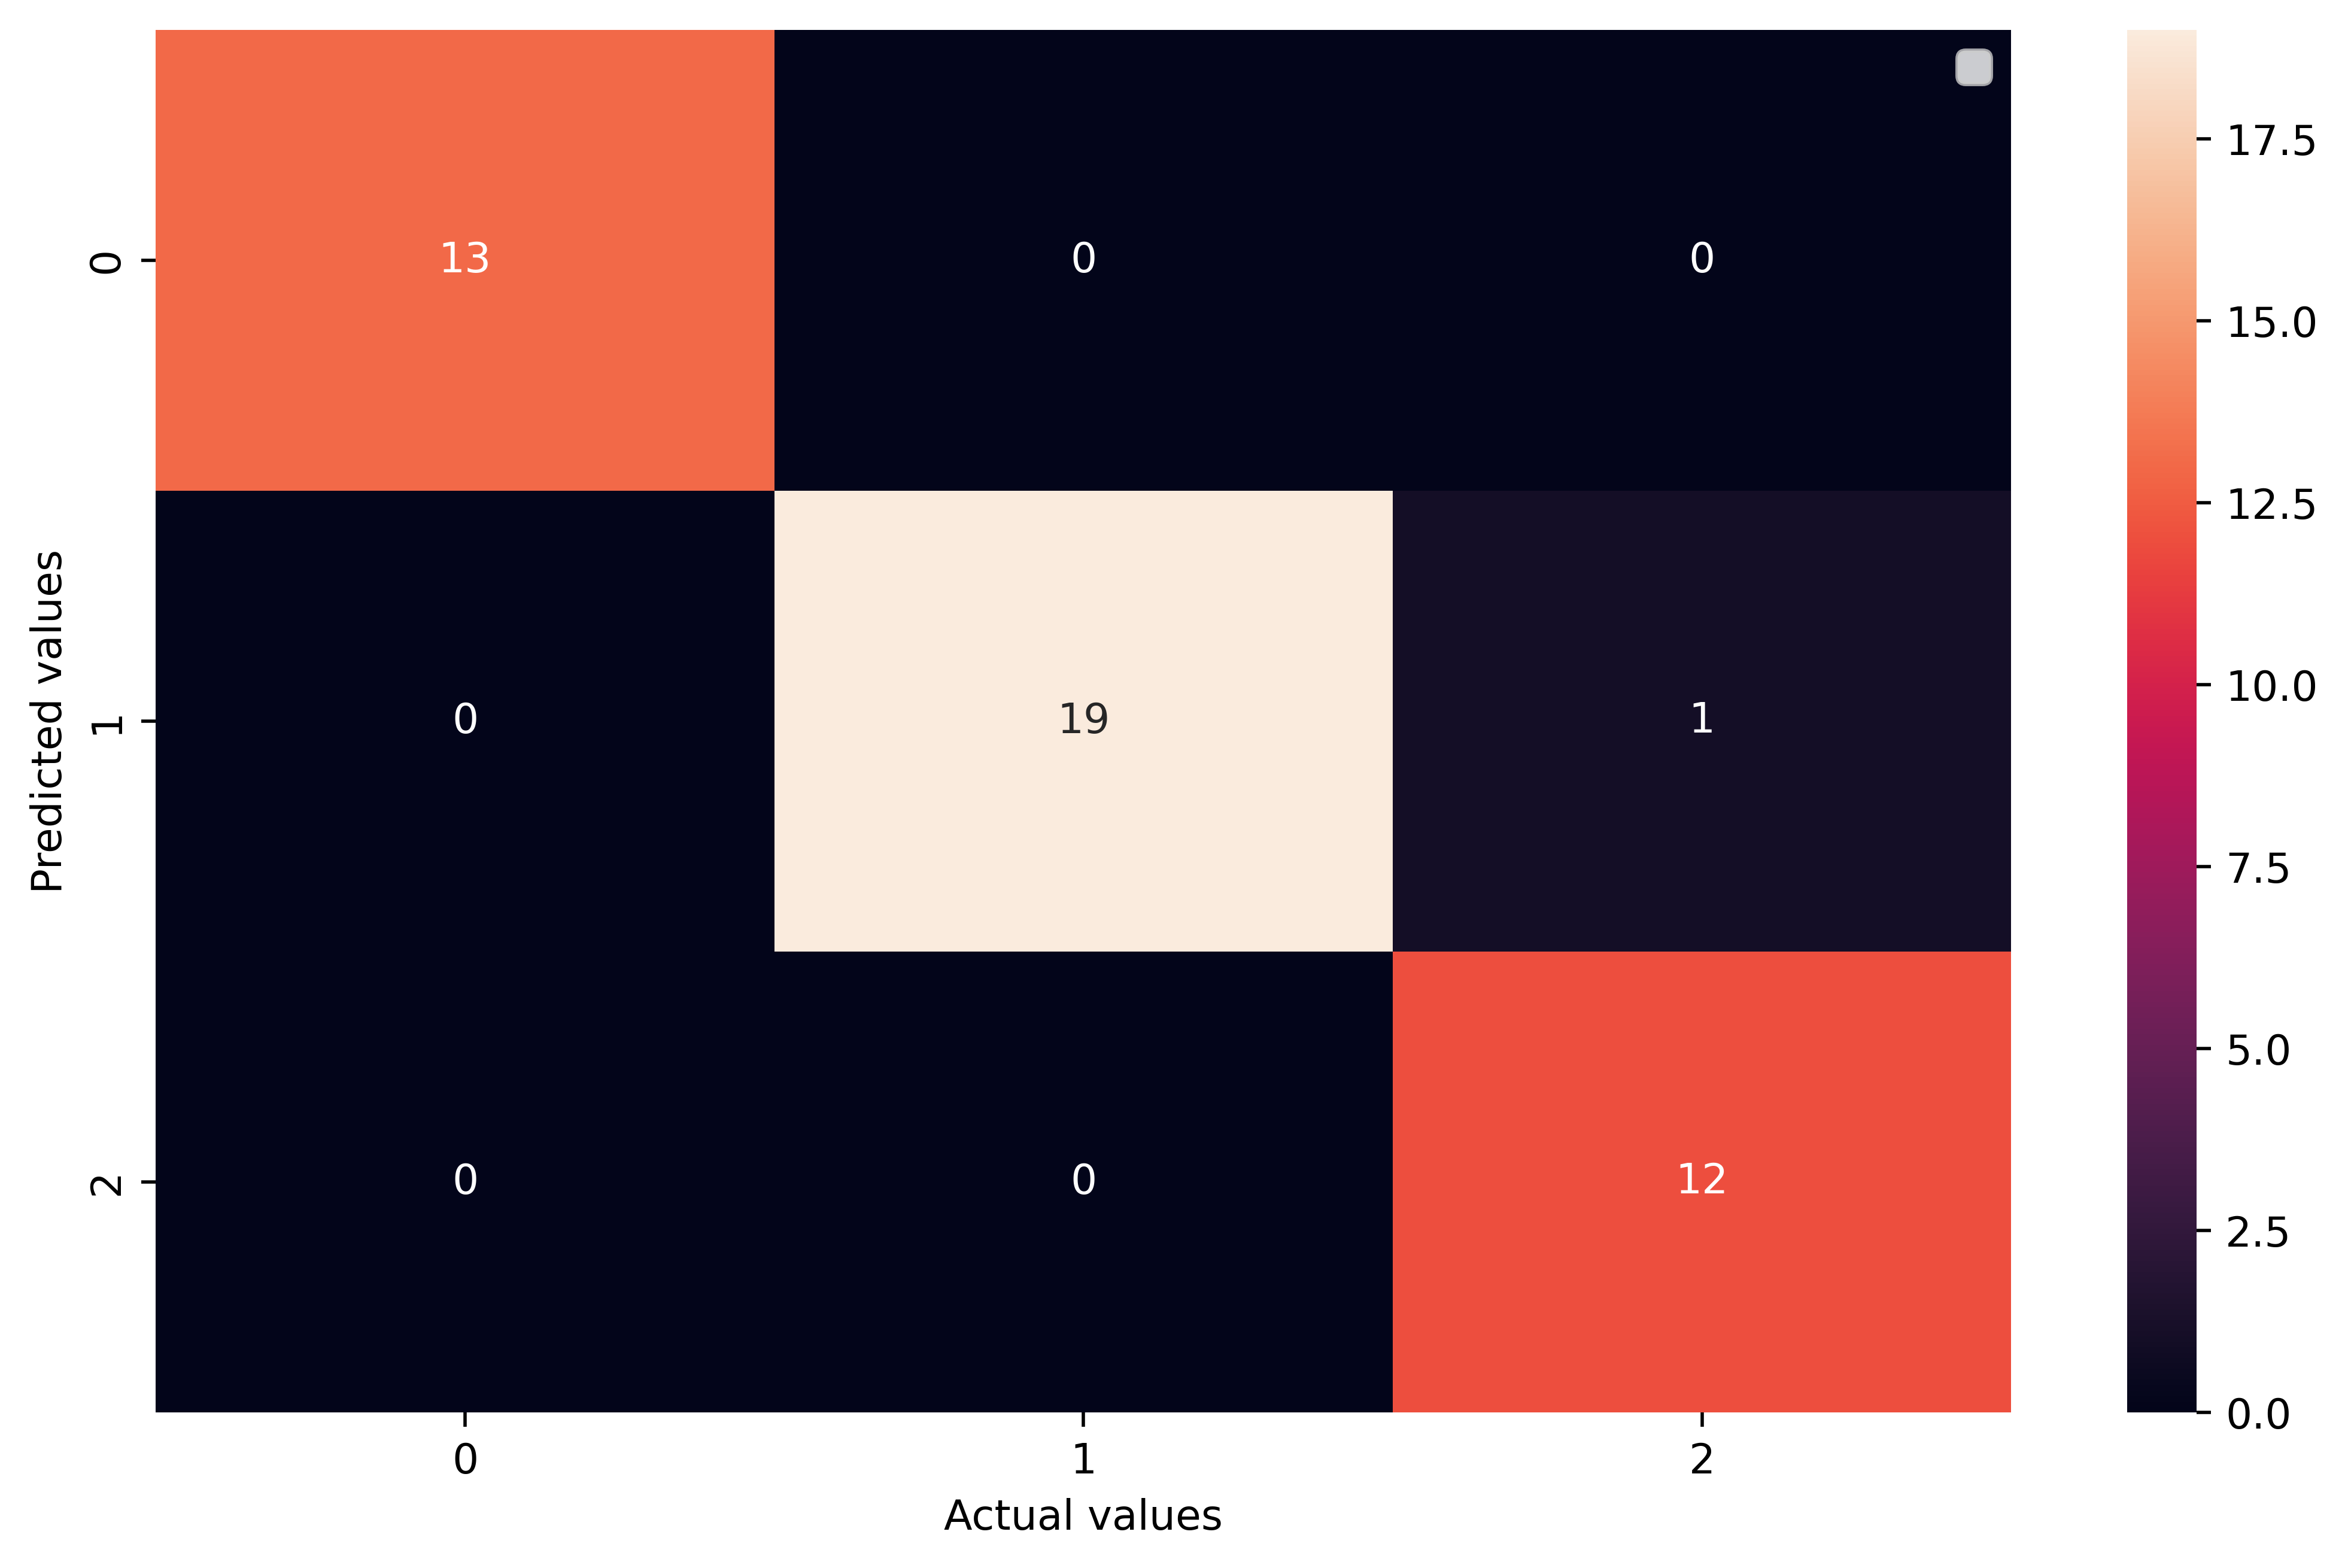

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

KNN

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred_knn = knn.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Test Accuracy:", accuracy)
print("KNN Test Precision:", precision)
print("KNN Test Recall:", recall)
print("KNN Test F1 Score:", f1)

KNN Test Accuracy: 1.0
KNN Test Precision: 1.0
KNN Test Recall: 1.0
KNN Test F1 Score: 1.0


In [41]:
cm = confusion_matrix(y_test, y_pred_knn)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


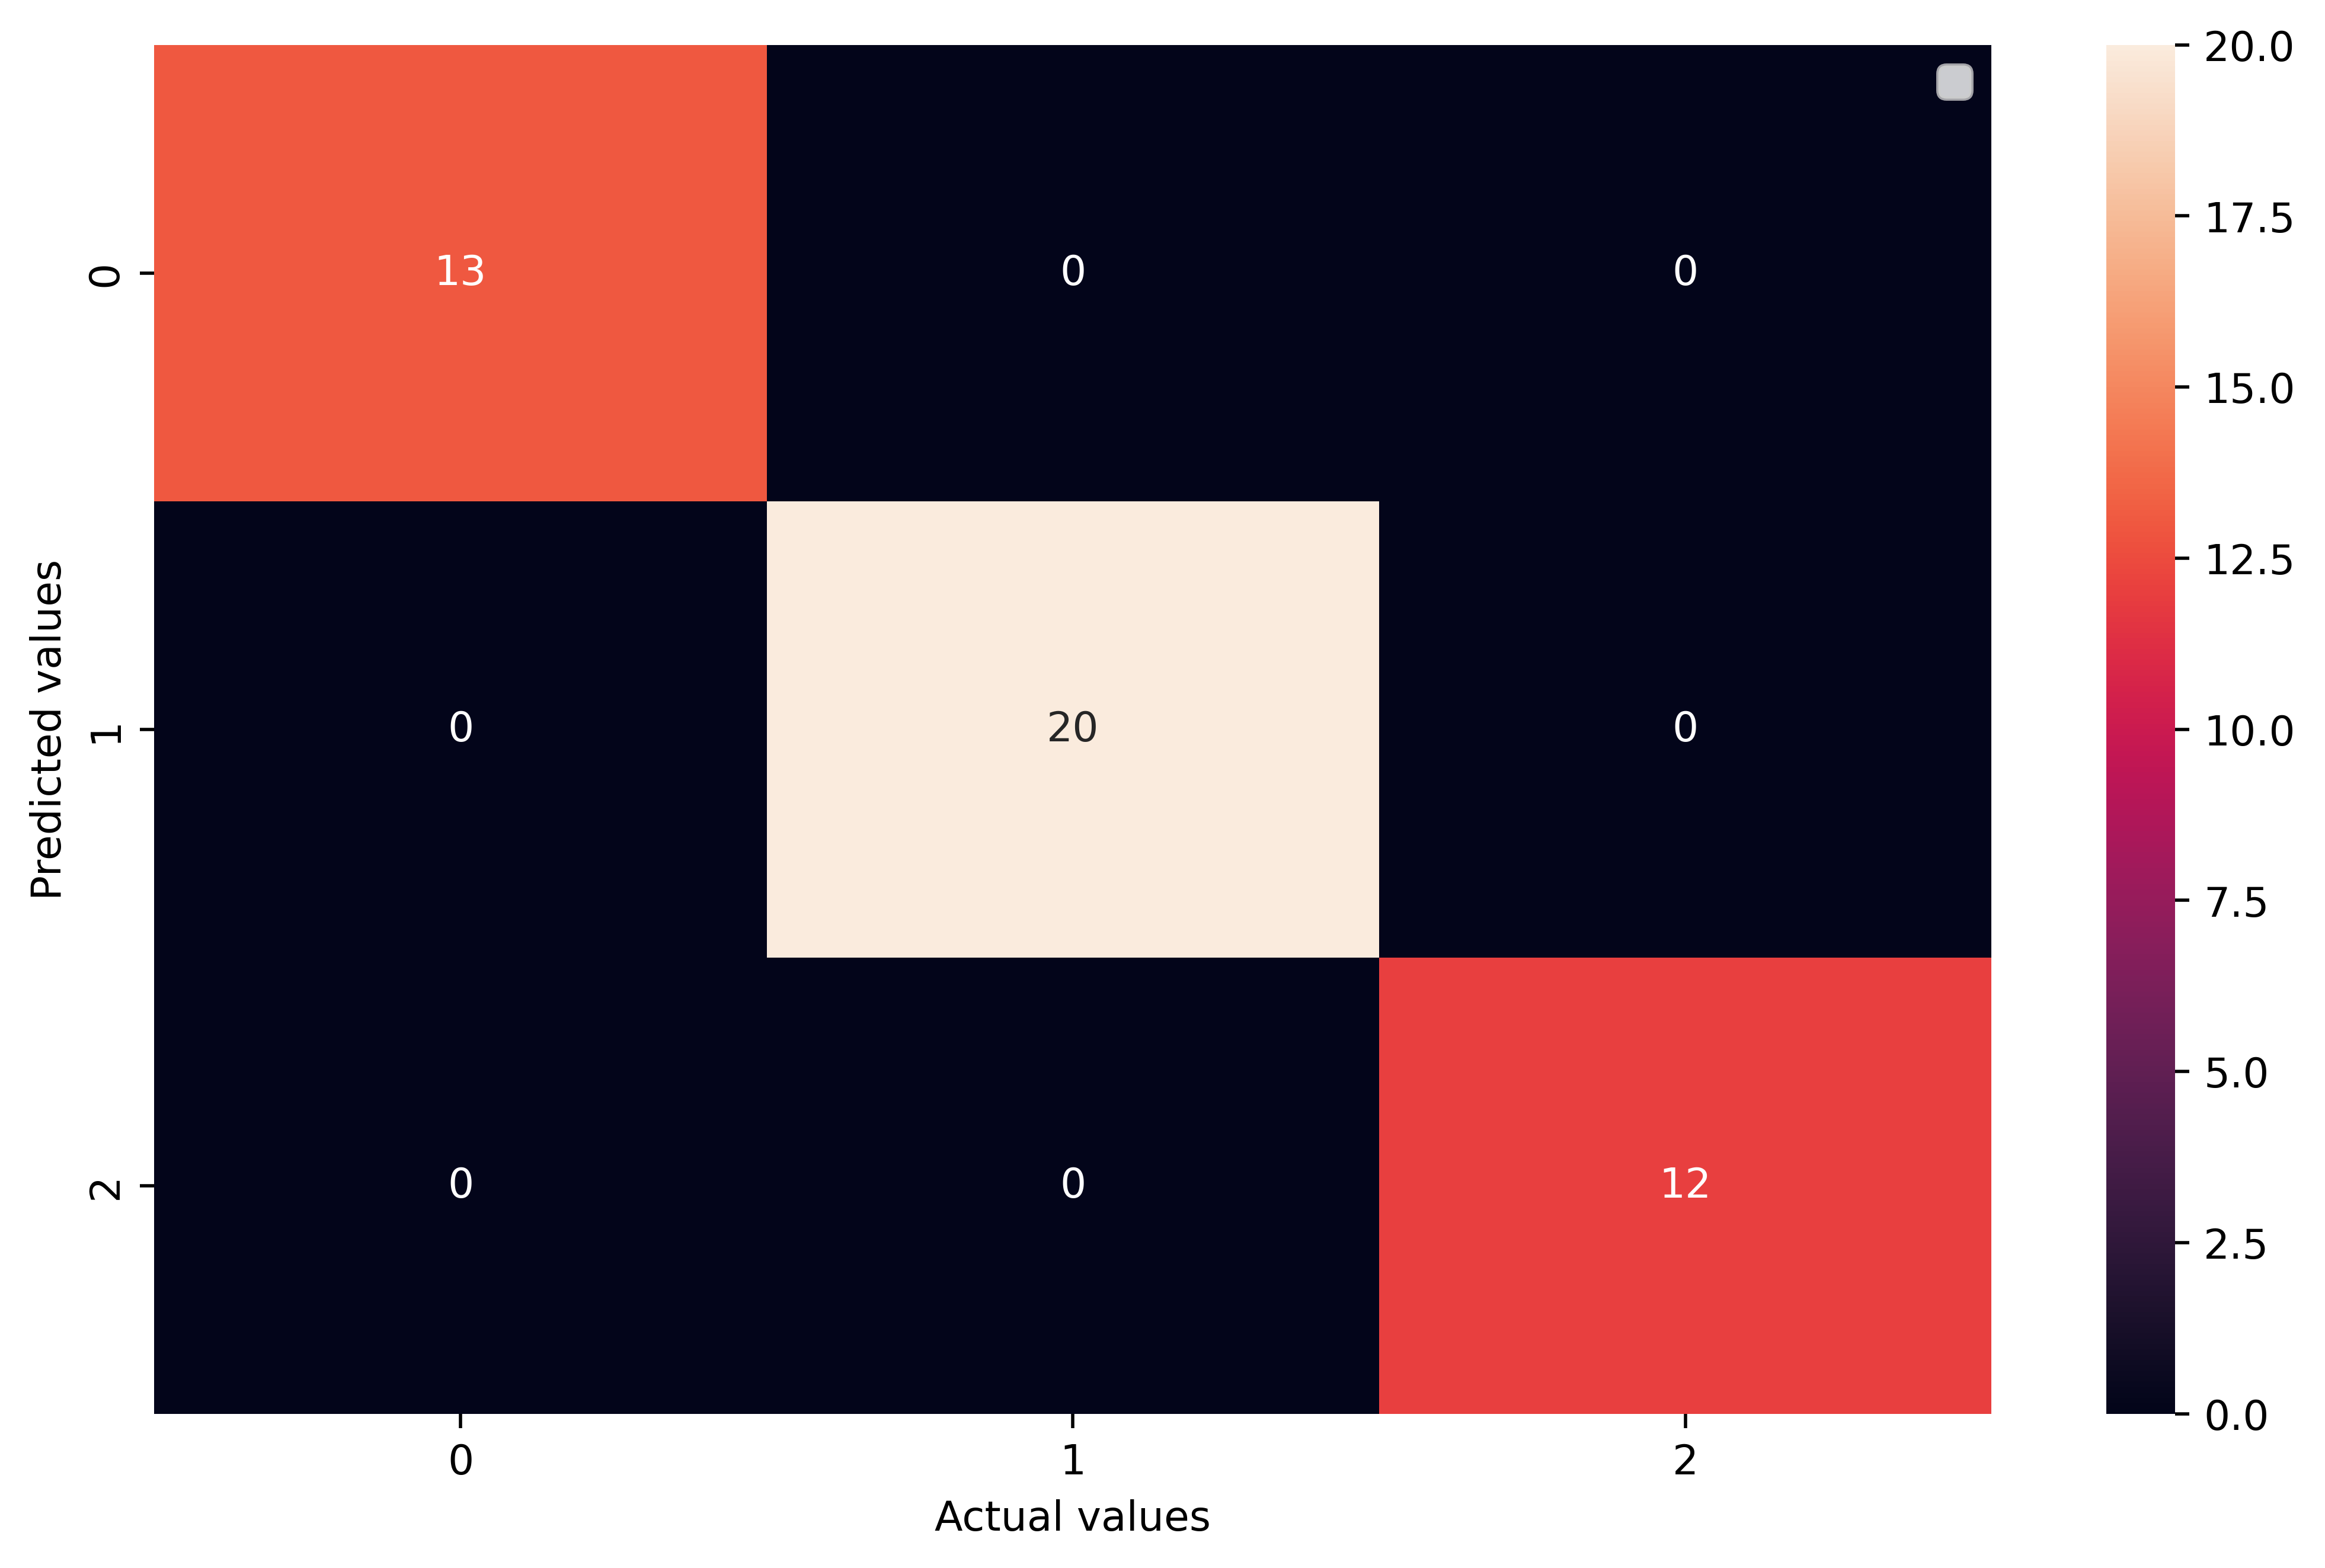

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

Decision Tree

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred_dt = dt.predict(x_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision tree Test Accuracy:", accuracy)
print("Decision tree Test Precision:", precision)
print("Decision tree Test Recall:", recall)
print("Decision tree Test F1 Score:", f1)

Decision tree Test Accuracy: 0.9555555555555556
Decision tree Test Precision: 0.9555555555555556
Decision tree Test Recall: 0.9555555555555556
Decision tree Test F1 Score: 0.9555555555555556


In [43]:
cm = confusion_matrix(y_test, y_pred_dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


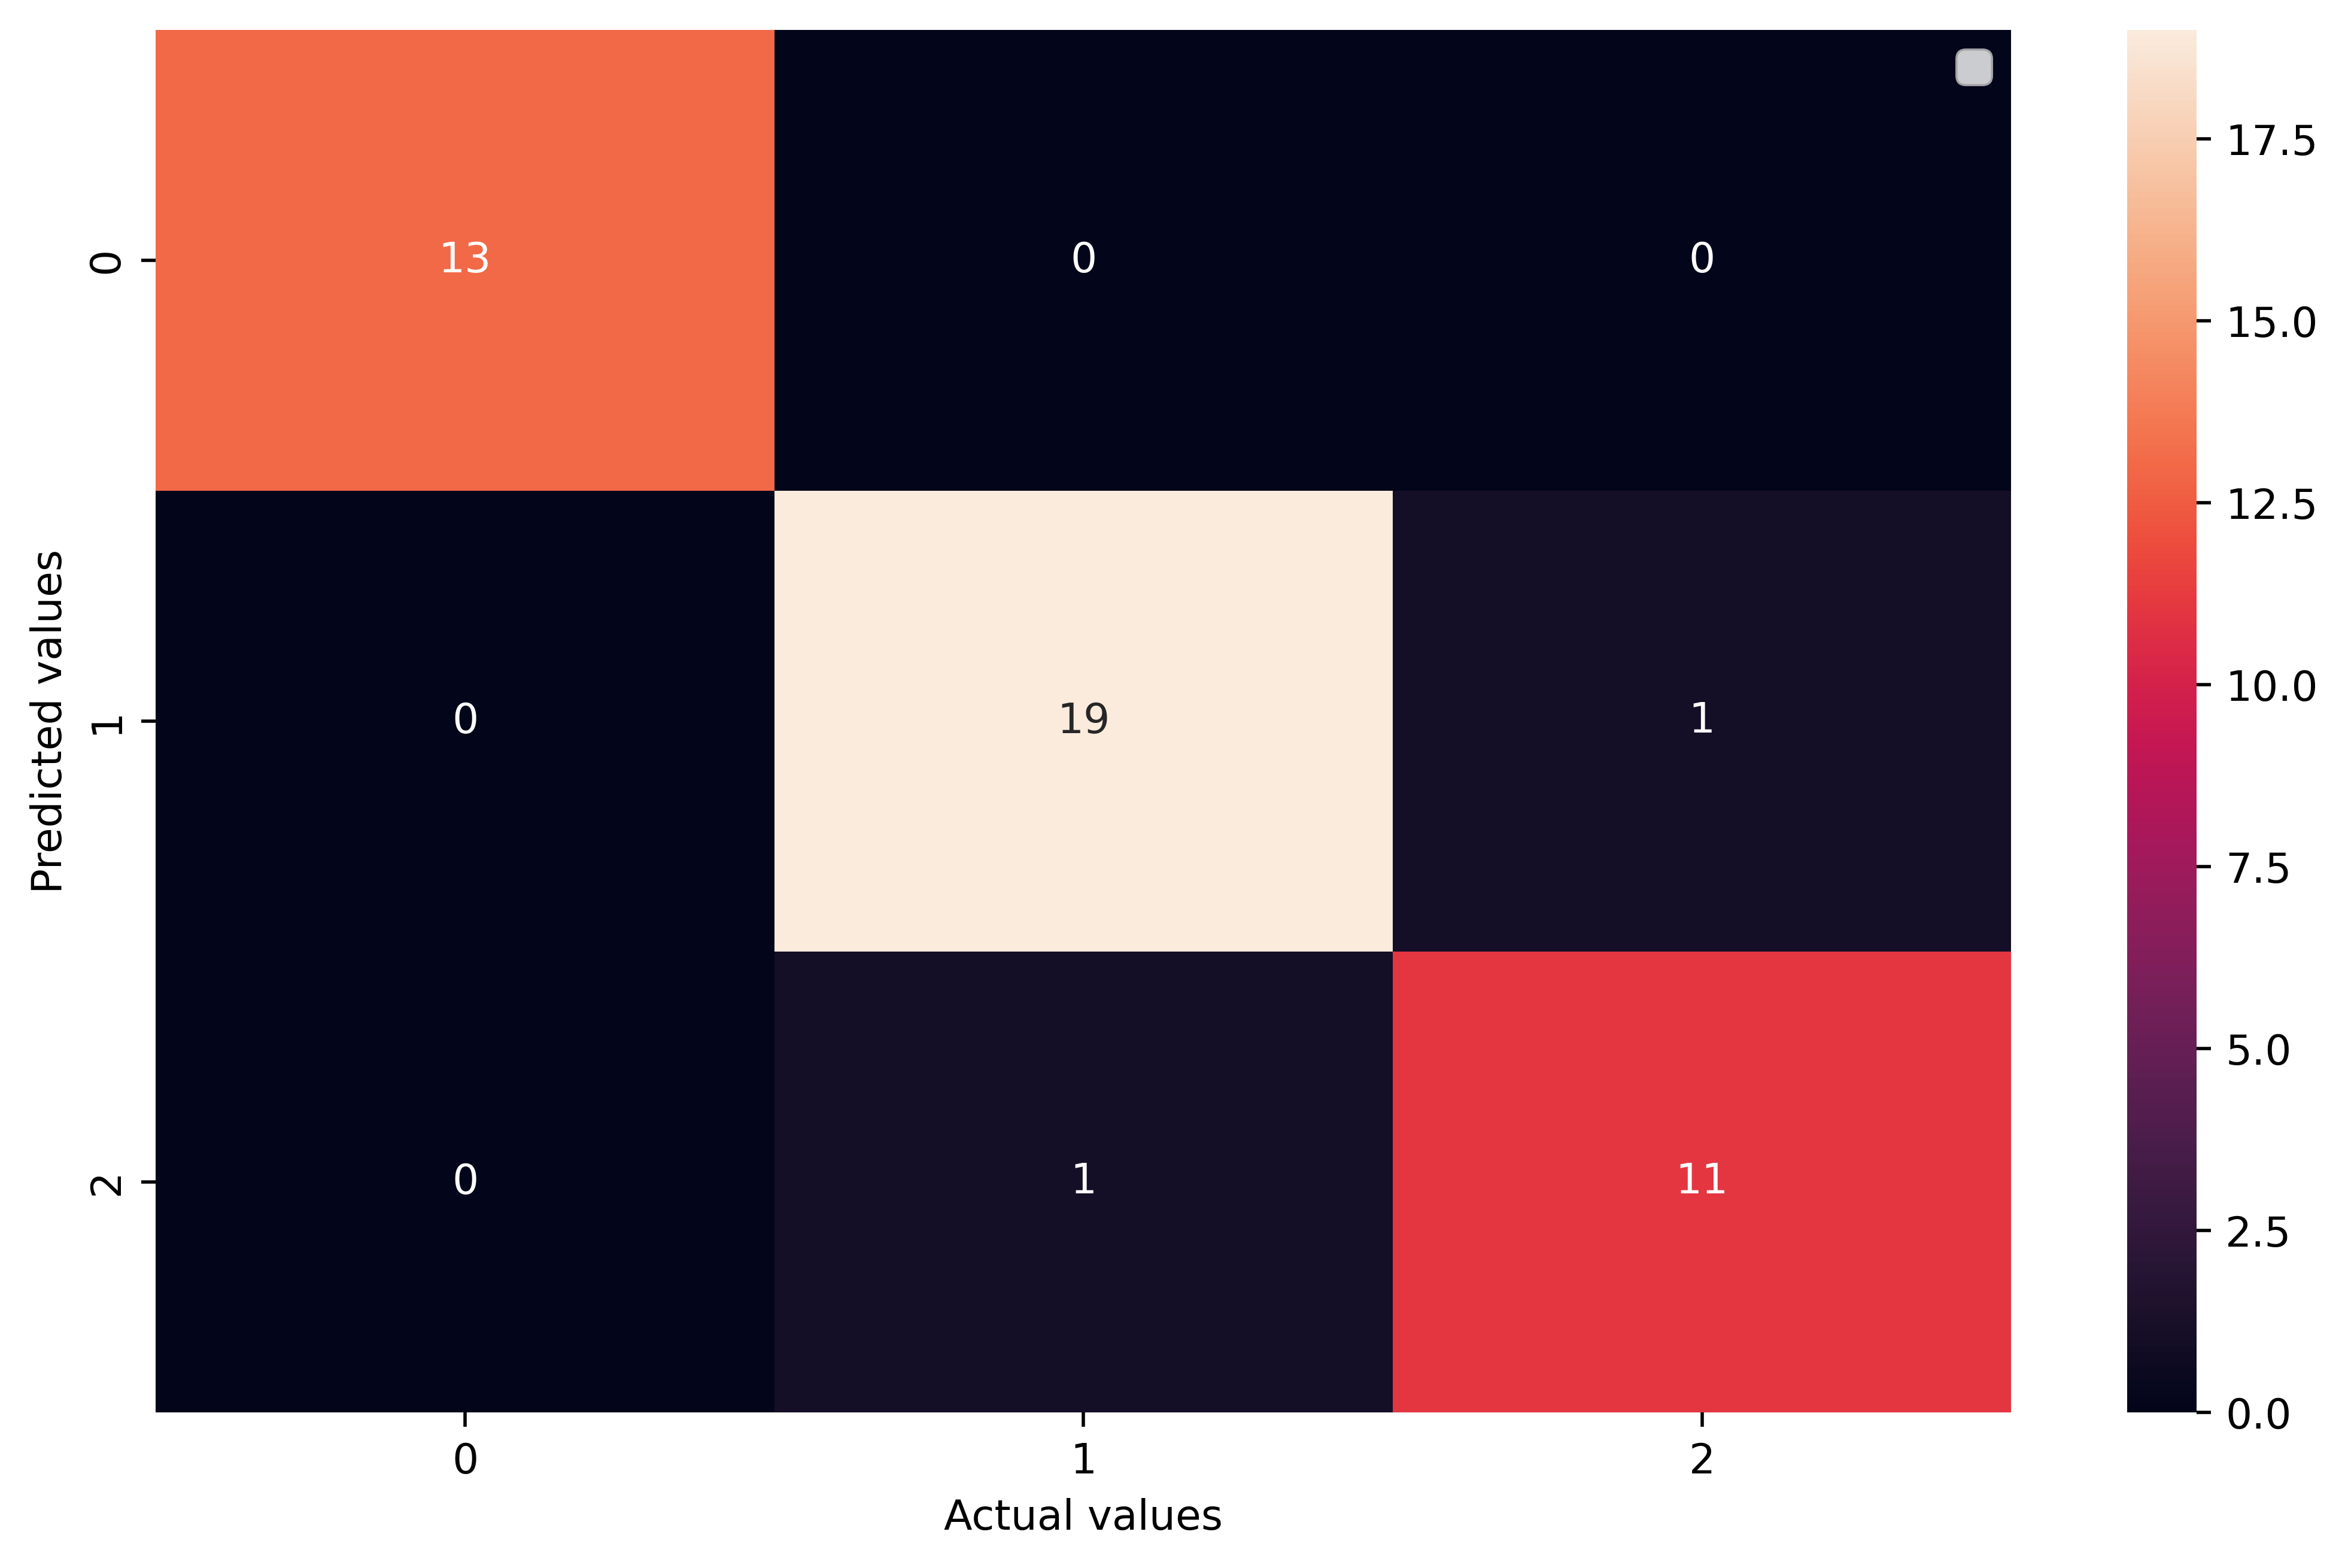

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()